In [ ]:
from __future__ import print_function
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
#Cargar imagen en escala de grises
x = cv2.imread('lenna.jpg', cv2.IMREAD_GRAYSCALE)

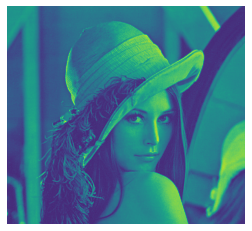

In [3]:
#Mostrar imagen leída por opencv sin ejes
plt.figure()
plt.imshow(x)
plt.axis('off')
plt.show()

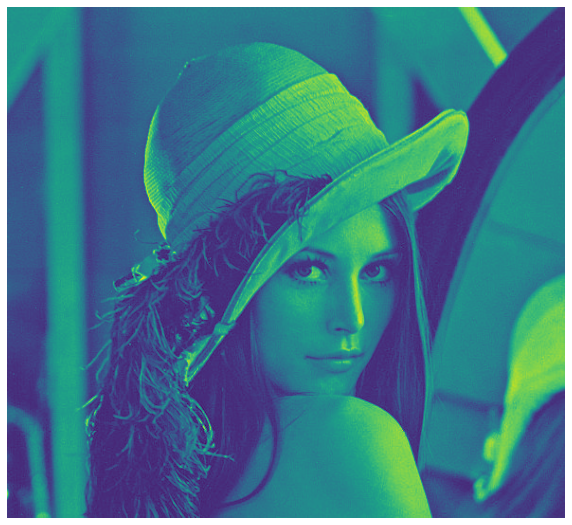

In [4]:
#ampliar imagen mostrada
fig, ax = plt.subplots()
fig.set_size_inches((10,15))
ax.imshow(x)
ax.axis('off')
plt.show()

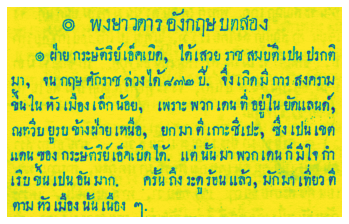

In [5]:
#Cargar imagen en escala de grises
img = cv2.imread('example1.png')#, cv2.IMREAD_GRAYSCALE) #IMREAD_UNCHANGED carga la imagen tal cual
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

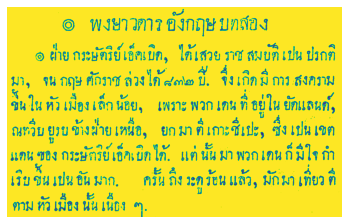

In [6]:
#Limpia la imagen de la huella de página
img = cv2.multiply(img, 1.2)

plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
kernel = np.ones((1, 1), np.uint8)

In [7]:
#Indroducción imágenes opencv.org
imag = cv2.imread(cv2.samples.findFile("lenna.jpg"))
if imag is None:
    sys.exit("No se puede leer la imagen.")
cv2.imshow("Imagen", imag)   #Mostrar imágenes con opencv
k = cv2.waitKey(0)
if k == ord("s"):
    cv2.imwrite("lenna.png", imag)


In [47]:
#Mask operations on matrices

def is_grayscale(my_image): # función para mirar la longitud de la imagen
    return len(my_image.shape) < 3

print(is_grayscale(img))
print(len(img.shape))

def saturated(sum_value): #No entiendo muy bien qué mide en la imagen (cantidad de colores?
    if sum_value > 255:
        sum_value = 255
    if sum_value < 0:
        sum_value = 0
    return sum_value

print(img.shape)
#print(cv2.cvtColor(img, cv2.CV_8U))

def sharpen(my_image):
    if is_grayscale(my_image):
        height, width = my_image.shape
    else:
        my_image = cv2.cvtColor(my_image, cv2.CV_8U) # Garantizar que la imagen tenga formato de 8 bits
        height, width, n_channels = my_image.shape # Crear imagen de salidacon las características de la entrada definida
    result = np.zeros(my_image.shape, my_image.dtype)
    
    for j in range(1, height - 1): # acceder a múltiples filas y columnas
        for i in range(1, width - 1):
            if is_grayscale(my_image):
                sum_value = 5 * my_image[j, i] - my_image[j + 1, i] - my_image[j - 1, i] \
                            - my_image[j, i + 1] - my_image[j, i - 1]
                result[j, i] = saturated(sum_value)
            else:
                for k in range(0, n_channels):
                    sum_value = 5 * my_image[j, i, k] - my_image[j + 1, i, k]  \
                                - my_image[j - 1, i, k] - my_image[j, i + 1, k]\
                                - my_image[j, i - 1, k]
                    result[j, i, k] = saturated(sum_value)
    
    return result

print(sharpen(img))

def main(argv):
    filename = 'lenna.jpg'
    img_codec = cv2.IMREAD_COLOR
    if argv:
        filename = sys.argv[1]
        if len(argv) >= 2 and sys.argv[2] == "G":
            img_codec = cv2.IMREAD_GRAYSCALE
    src = cv2.imread(cv2.samples.findFile(filename), img_codec)
    if src is None:
        print("No se puede abrir la imagen [" + filename + "]")
        print("Usage:")
        print("mat_mask_operations.py [image_path -- default lena.jpg] [G -- grayscale]")
        return -1
    cv2.namedWindow("Input", cv2.WINDOW_AUTOSIZE)
    cv2.namedWindow("Output", cv2.WINDOW_AUTOSIZE)
    cv2.imshow("Input", src)
    t = round(time.time())
    dst0 = sharpen(src)
    t = (time.time() - t)
    print("Hand written function time passed in seconds: %s" % t)
    cv2.imshow("Output", dst0)
    cv2.waitKey()
    t = time.time()
    
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]], np.float32)  # kernel should be floating point type
    
    dst1 = cv2.filter2D(src, -1, kernel)
    # ddepth = -1, means destination image has depth same as input image
    
    t = (time.time() - t)
    print("Built-in filter2D time passed in seconds:     %s" % t)
    cv2.imshow("Output", dst1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return 0

True
2
(624, 996)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
# if __name__ == "__main__":
#   main(sys.argv[1:])

In [48]:
cv2.imwrite("example1.png", img)
y = cv2.imdecode('lenna.jpg', cv2.IMREAD_GRAYSCALE)

TypeError: Expected Ptr<cv::UMat> for argument 'buf'

In [53]:
img[:] = 0 #poner una imagen de escala de grises a negro
_smallImg = img[10:110,10:110]  #Seleccionar una región de interés
print(_smallImg)

src = cv2.imread(cv2.samples.findFile('lenna.jpg'), cv2.IMREAD_COLOR)
_dst = src.astype(np.float32)

#print(src)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
    img = cv2.imread('lenna.jpg')
    cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
    cv2.imshow('image', img)
    cv2.waitKey()